In [214]:
import pandas as pd
import numpy as np
import csv
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [215]:
fields = ['qW','qX','qY','qZ','m0','m1','m2','m3','c0','c1','c2','c3','t0','t1','t2'] 

In [216]:
df = pd.read_csv(r'BOUNCYDRONE.txt',names=fields)

In [217]:
df['qW'] = df['qW'].str.replace('[','').astype(int)
df['t2'] = df['t2'].str.replace(']','').astype(int)
df['timeStamp'] = df.t0 | (df.t1 * (2**8)) | (df.t2 *(2**16))

In [ ]:
df['qW'] = 

In [ ]:
2/255 - 1

In [218]:
df

,qW,qX,qY,qZ,m0,m1,m2,m3,c0,c1,c2,c3,t0,t1,t2,timeStamp
0,225,127,126,209,0,0,0,0,127,127,0,127,218,12,0,3290
1,225,127,126,209,0,0,0,0,127,127,0,127,223,12,0,3295
2,225,127,127,209,0,0,0,0,127,127,0,127,240,12,0,3312
3,29,127,127,45,0,0,0,0,127,127,0,127,4,13,0,3332
4,225,127,127,209,0,0,0,0,127,127,0,127,23,13,0,3351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,115,176,11,113,0,0,0,0,127,127,0,127,212,40,0,10452
360,115,173,10,113,0,0,0,0,127,127,0,127,232,40,0,10472
361,114,171,9,113,0,0,0,0,127,127,0,127,252,40,0,10492
362,114,168,8,114,0,0,0,0,127,127,0,127,16,41,0,10512


# Quaternions

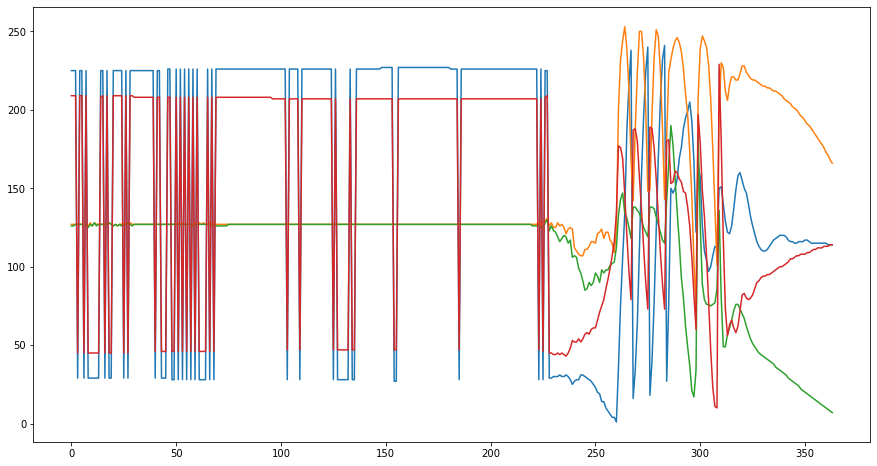

In [241]:
figure(figsize=(15, 8))
plt.plot(df.qW)
plt.plot(df.qX)
plt.plot(df.qY)
plt.plot(df.qZ)

# Motor Speeds

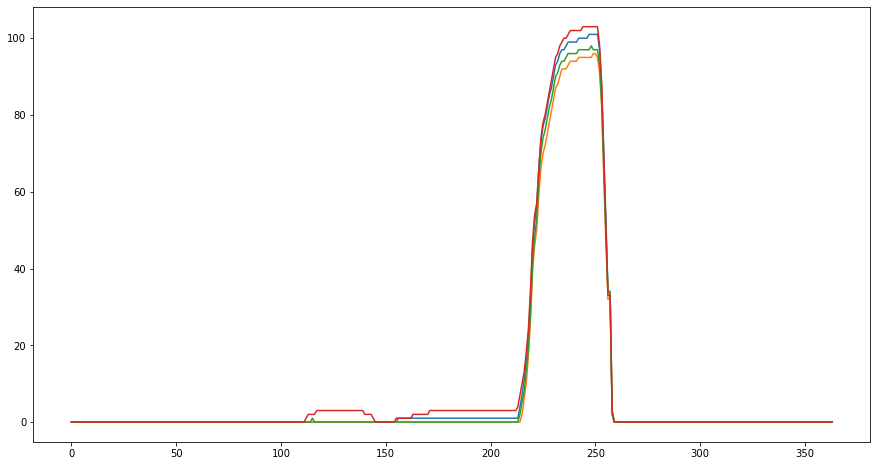

In [240]:
figure(figsize=(15, 8))
plt.plot(df.m0)
plt.plot(df.m1)
plt.plot(df.m2)
plt.plot(df.m3)

# Control Speeds

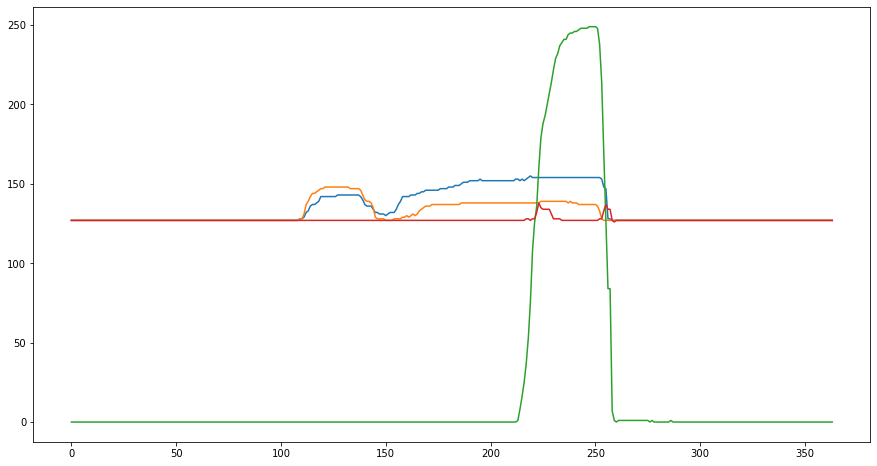

In [239]:
figure(figsize=(15, 8))
plt.plot(df.c0)
plt.plot(df.c1)
plt.plot(df.c2)
plt.plot(df.c3)

# Time Stamps

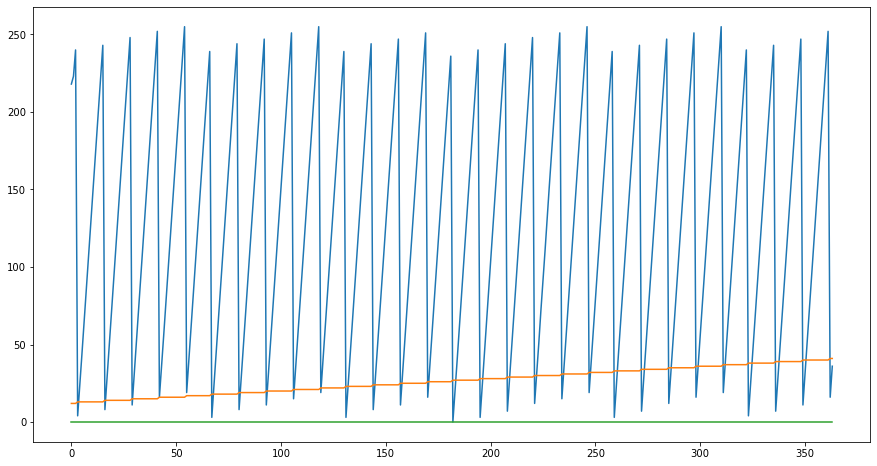

In [238]:
figure(figsize=(15, 8))
plt.plot(df.t0)
plt.plot(df.t1)
plt.plot(df.t2)

# Packet Loss

In [229]:
loss = []
for i in range(1,len(df.timeStamp)):
    loss.append(df.timeStamp[i]-df.timeStamp[i-1])

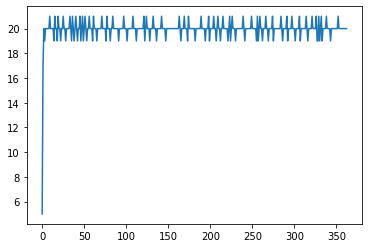

In [230]:
plt.plot(loss)

# Feature Histograms

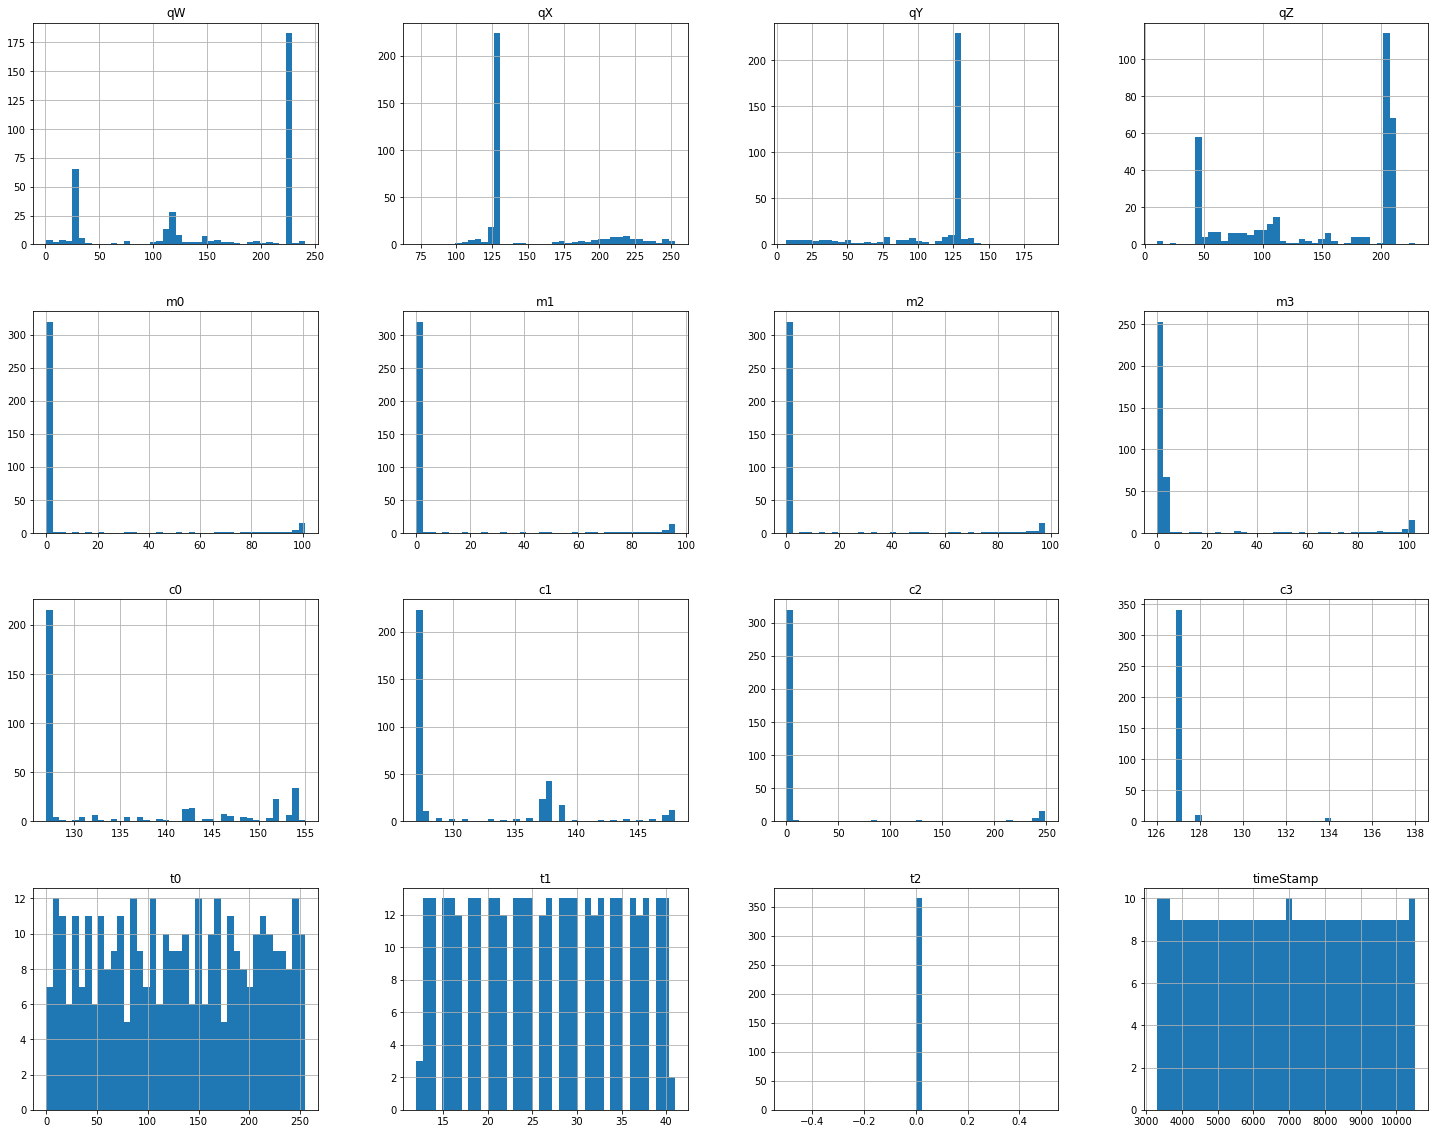

In [231]:
df.hist(bins=40, figsize=(25,20))
plt.show()

# Pearson Correlation Coefficient Matrix

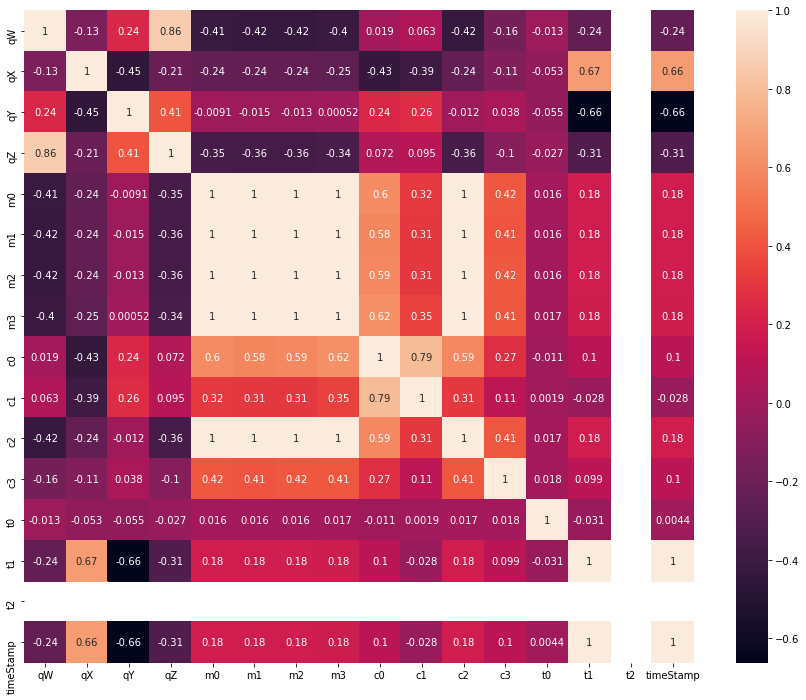

In [233]:
figure(figsize=(15, 12))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()